In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import warnings
from collections import Counter
warnings.filterwarnings('ignore')


## 1.1 Import Data

In [2]:
# Directory containing all datasets
directory = './dataset_nba'

# List of CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Dictionary to memorize DataFrames
dataframes = {}

# Importa i file CSV e assegna loro nomi basati sul titolo del file
for file_name in csv_files:
    # Estrai il titolo del file (senza l'estensione .csv)
    title = os.path.splitext(file_name)[0]
    
    # Costruisci il percorso completo del file
    file_path = os.path.join(directory, file_name)
    
    # Leggi il file CSV in un DataFrame e assegna il titolo come chiave
    dataframes[title] = pd.read_csv(file_path)
    dataframes[title]['Season'] = str(title[:4])
    

# Ora puoi accedere ai tuoi DataFrame utilizzando i titoli assegnati ai file
# Ad esempio, per accedere al DataFrame del file 'file1.csv':
dataframes['2018-rookies']


,Rk,Player,Debut,Age,Yrs,G,MPTOT,FG,FGA,3P,...,PTSTOT,FG%,3P%,FT%,MP,PTS,TRB,AST,ID,Season
0,1,Bam Adebayo,Oct 18 '17 MIA @ ORL,20,1,69,1368,174,340,0,...,477,0.512,0.000,0.721,19.8,6.9,5.5,1.5,adebaba01,2018
1,2,Jarrett Allen,Oct 20 '17 BRK vs. ORL,19,1,72,1441,234,397,5,...,587,0.589,0.333,0.776,20.0,8.2,5.4,0.7,allenja01,2018
2,3,Kadeem Allen,Dec 11 '17 BOS @ CHI,25,1,18,107,6,22,0,...,19,0.273,0.000,0.778,5.9,1.1,0.6,0.7,allenka01,2018
3,4,Ike Anigbogu,Oct 20 '17 IND vs. POR,19,1,11,30,4,9,0,...,13,0.444,NaN,0.833,2.7,1.2,0.8,0.0,anigbik01,2018
4,5,OG Anunoby,Oct 19 '17 TOR vs. CHI,20,1,74,1481,163,346,73,...,438,0.471,0.371,0.629,20.0,5.9,2.5,0.7,anunoog01,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,116,Matt Williams,Dec 23 '17 MIA vs. NOP,24,1,3,11,2,6,1,...,5,0.333,0.200,NaN,3.7,1.7,0.3,0.0,willima05,2018
116,117,D.J. Wilson,Oct 20 '17 MIL vs. CLE,21,1,22,71,9,16,2,...,21,0.563,0.400,0.500,3.2,1.0,0.5,0.1,wilsodj01,2018
117,118,Jamil Wilson,Nov 20 '17 LAC @ NYK,27,1,15,274,38,81,27,...,105,0.469,0.429,0.500,18.3,7.0,2.1,0.7,wilsoja02,2018
118,119,Guerschon Yabusele,Oct 20 '17 BOS @ PHI,22,1,33,235,26,61,12,...,79,0.426,0.324,0.682,7.1,2.4,1.6,0.5,yabusgu01,2018


In [3]:
rookies_id = dict()
for year in range(2018, 2024):
    rookies_id[year] = dataframes.get(f'{year}-rookies')['ID'].tolist()

rookies_id

{2018: ['adebaba01',
  'allenja01',
  'allenka01',
  'anigbik01',
  'anunoog01',
  'arcidry01',
  'artisja01',
  'bacondw01',
  'balllo01',
  'belljo01',
  'birchkh01',
  'birdja01',
  'blakean01',
  'bogdabo01',
  'bouchch01',
  'bradlto01',
  'brookdi01',
  'brownst02',
  'bryanth01',
  'carusal01',
  'cavanty01',
  'clavegi01',
  'clevean01',
  'collijo01',
  'colliza01',
  'colliky01',
  'cookech01',
  'costema01',
  'craigto01',
  'dorsety01',
  'dotsoda01',
  'doylemi01',
  'doziepj01',
  'evansja01',
  'fergute01',
  'foxde01',
  'fultzma01',
  'grayjo01',
  'hamilda02',
  'harrish01',
  'hartjo01',
  'hayesni01',
  'hearnre01',
  'henrymy01',
  'hicksis01',
  'hollajo02',
  'huntevi01',
  'ingraan01',
  'isaacjo01',
  'iwundwe01',
  'jacksaa01',
  'jacksjo02',
  'jacksju01',
  'jamesmi02',
  'johnsda04',
  'johnsom01',
  'jonesja04',
  'kennalu01',
  'klebima01',
  'korkmfu01',
  'kornelu01',
  'kuzmaky01',
  'leaftj01',
  'leeda03',
  'lemonwa01',
  'lydonty01',
  'magetjo01',

In [4]:
df_final = pd.DataFrame()

for year_rookie in range(2018, 2024):
    for year_player in range(year_rookie, 2024):
        df_att = dataframes.get(f'{year_player}-players')
        df_att = df_att[df_att['ID'].isin(rookies_id[year_rookie])]
        df_final = pd.concat([df_att, df_final], ignore_index=True)

df_final

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
0,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01,2023
1,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9,baldwpa01,2023
2,23,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,...,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,banchpa01,2023
3,26,Dominick Barlow,PF,19,SAS,28,0,14.6,1.6,3.1,...,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,barlodo01,2023
4,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1,beaucma01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,522,Matt Williams,SG,24,MIA,3,0,3.7,0.7,2.0,...,0.3,0.3,0.0,0.0,0.0,0.3,0.3,1.7,willima05,2018
1955,524,D.J. Wilson,PF,21,MIL,22,0,3.2,0.4,0.7,...,0.4,0.5,0.1,0.1,0.0,0.2,0.3,1.0,wilsodj01,2018
1956,525,Jamil Wilson,SF,27,LAC,15,10,18.3,2.5,5.4,...,1.9,2.1,0.7,0.3,0.5,0.5,2.3,7.0,wilsoja02,2018
1957,531,Guerschon Yabusele,PF,22,BOS,33,4,7.1,0.8,1.8,...,1.1,1.6,0.5,0.1,0.2,0.4,0.7,2.4,yabusgu01,2018


Eliminiamo le righe relative ai giocatori che hanno cambiato squadra nell'arco della stagione, mantenendo solo la riga relativa alle statistiche delle 2 o più squadre in cui ha militato.

In [5]:
condition = (df_final['Tm'] != 'TOT') & df_final.duplicated(subset=['ID', 'Season'], keep=False)

# Applica le condizioni utilizzando il metodo loc
df = df_final.loc[~condition]
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
0,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01,2023
1,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9,baldwpa01,2023
2,23,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,...,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,banchpa01,2023
3,26,Dominick Barlow,PF,19,SAS,28,0,14.6,1.6,3.1,...,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,barlodo01,2023
4,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1,beaucma01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,522,Matt Williams,SG,24,MIA,3,0,3.7,0.7,2.0,...,0.3,0.3,0.0,0.0,0.0,0.3,0.3,1.7,willima05,2018
1955,524,D.J. Wilson,PF,21,MIL,22,0,3.2,0.4,0.7,...,0.4,0.5,0.1,0.1,0.0,0.2,0.3,1.0,wilsodj01,2018
1956,525,Jamil Wilson,SF,27,LAC,15,10,18.3,2.5,5.4,...,1.9,2.1,0.7,0.3,0.5,0.5,2.3,7.0,wilsoja02,2018
1957,531,Guerschon Yabusele,PF,22,BOS,33,4,7.1,0.8,1.8,...,1.1,1.6,0.5,0.1,0.2,0.4,0.7,2.4,yabusgu01,2018


In [6]:
df.sort_values(by=['ID', 'Season'])

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
496,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01,2021
403,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,achiupr01,2022
339,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,achiupr01,2023
1343,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2,adamsja01,2019
1172,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,adamsja01,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,603,Omer Yurtseven,C,23,MIA,56,12,12.6,2.3,4.4,...,3.7,5.3,0.9,0.3,0.4,0.7,1.5,5.3,yurtsom01,2022
189,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4,yurtsom01,2023
1958,539,Ante Žižić,C,21,CLE,32,2,6.7,1.5,2.1,...,1.1,1.9,0.2,0.1,0.4,0.3,0.9,3.7,zizican01,2018
1829,529,Ante Žižić,C,22,CLE,59,25,18.3,3.1,5.6,...,3.6,5.4,0.9,0.2,0.4,1.0,1.9,7.8,zizican01,2019


In [7]:
rookies_id[2023]

['agbajoc01',
 'baldwpa01',
 'banchpa01',
 'barlodo01',
 'beaucma01',
 'boehebu01',
 'bouyeja01',
 'branhma01',
 'braunch01',
 'brownke03',
 'butlejo01',
 'cainja01',
 'champju02',
 'chandke01',
 'chrisma02',
 'comanch01',
 'cooksxa01',
 'daniedy01',
 'davisjo06',
 'davisjd01',
 'daysda01',
 'diabamo01',
 'diengou01',
 'durenja01',
 'easonta01',
 'elliske01',
 'fontesi01',
 'fostemi02',
 'gilyaja01',
 'grayra01',
 'greenaj01',
 'griffaj01',
 'halljo02',
 'hardyja02',
 'harpero02',
 'harrike01',
 'houstca01',
 'hudgitr01',
 'iveyja01',
 'jacksqu01',
 'jovicni01',
 'juzanjo01',
 'keelstr01',
 'kesslwa01',
 'kolokch01',
 'laravja01',
 'lawsoaj01',
 'loftoke01',
 'martity01',
 'mathube01',
 'mcgowbr01',
 'minayju01',
 'minotjo01',
 'mobleis01',
 'monekch01',
 'moorewe01',
 'murrake02',
 'nembhan01',
 'pippesc02',
 'prestja01',
 'quinole01',
 'rhodeja01',
 'robinor01',
 'roddyda01',
 'rolliry01',
 'seabrde01',
 'sharpsh01',
 'smithdr01',
 'smithja05',
 'sochaje01',
 'swideco01',
 'terryda01

## 1.2 Analyze data

Let's start analyzing 

In [8]:
min_season = df.groupby("ID")["Season"].transform("min")

## DATASET SOLO DEL PRIMO ANNO DI OGNI ROOKIE

# Selezioniamo le righe in cui il valore di season è uguale al valore minimo per ogni ID
filtered_df = df[df["Season"] == min_season]

filtered_df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,ID,Season
0,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,agbajoc01,2023
1,20,Patrick Baldwin Jr.,SF,20,GSW,31,0,7.3,1.4,3.5,...,1.3,1.3,0.4,0.2,0.1,0.4,0.5,3.9,baldwpa01,2023
2,23,Paolo Banchero,PF,20,ORL,72,72,33.8,6.7,15.6,...,5.7,6.9,3.7,0.8,0.5,2.8,2.2,20.0,banchpa01,2023
3,26,Dominick Barlow,PF,19,SAS,28,0,14.6,1.6,3.1,...,2.0,3.6,0.9,0.4,0.7,0.5,2.0,3.9,barlodo01,2023
4,37,MarJon Beauchamp,SF,22,MIL,52,11,13.5,1.8,4.7,...,1.5,2.2,0.7,0.4,0.1,0.9,1.4,5.1,beaucma01,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,522,Matt Williams,SG,24,MIA,3,0,3.7,0.7,2.0,...,0.3,0.3,0.0,0.0,0.0,0.3,0.3,1.7,willima05,2018
1955,524,D.J. Wilson,PF,21,MIL,22,0,3.2,0.4,0.7,...,0.4,0.5,0.1,0.1,0.0,0.2,0.3,1.0,wilsodj01,2018
1956,525,Jamil Wilson,SF,27,LAC,15,10,18.3,2.5,5.4,...,1.9,2.1,0.7,0.3,0.5,0.5,2.3,7.0,wilsoja02,2018
1957,531,Guerschon Yabusele,PF,22,BOS,33,4,7.1,0.8,1.8,...,1.1,1.6,0.5,0.1,0.2,0.4,0.7,2.4,yabusgu01,2018


Punti, rimbalzi e assist medi per ogni anno.

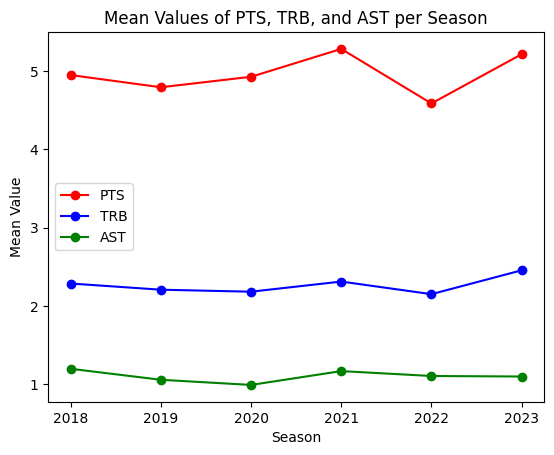

In [9]:
PTS_per_season = filtered_df.groupby('Season')['PTS'].mean()
TRB_per_season = filtered_df.groupby('Season')['TRB'].mean()
AST_per_season = filtered_df.groupby('Season')['AST'].mean()

fig, ax1 = plt.subplots()

# Plot the PTS data as a line with red color
ax1.plot(PTS_per_season.index, PTS_per_season.values, color='red', label='PTS', marker = 'o')

# Plot the TRB data as a line with blue color
ax1.plot(TRB_per_season.index, TRB_per_season.values, color='blue', label='TRB', marker = 'o')

# Plot the AST data as a line with green color
ax1.plot(AST_per_season.index, AST_per_season.values, color='green', label='AST', marker = 'o')

# Add a legend
ax1.legend(loc='center left')

# Set the x-axis label and y-axis label
ax1.set_xlabel('Season')
ax1.set_ylabel('Mean Value')

# Set the title of the graph
ax1.set_title('Mean Values of PTS, TRB, and AST per Season')
plt.show()

# pt assist rimbalzi

Analyze positions

In [10]:
Counter(filtered_df['Pos'].tolist())

Counter({'SG': 200,
         'SF': 127,
         'PF': 121,
         'PG': 115,
         'C': 80,
         'SG-SF': 1,
         'SF-SG': 1,
         'SG-PG': 1,
         'PF-SF': 1,
         'C-PF': 1})

Modifico i ruoli per entrambi i df (DA FARE PER IL SECONDO DF SE SERVE )

In [15]:
filtered_df['Pos'].replace('SG-SF', 'SG', inplace=True)
filtered_df['Pos'].replace('SF-SG', 'SF', inplace=True)
filtered_df['Pos'].replace('SG-PG', 'SG', inplace=True)
filtered_df['Pos'].replace('PF-SF', 'PF', inplace=True)
filtered_df['Pos'].replace('C-PF', 'C', inplace=True)
Counter(filtered_df['Pos'].tolist())

Counter({'SG': 202, 'SF': 128, 'PF': 122, 'PG': 115, 'C': 81})

In [17]:
list_roles = filtered_df['Pos'].unique().tolist() # estraggo le differenti posizioni

PTS_per_season_pos = filtered_df.groupby(['Season', 'Pos'])['PTS'].mean()
TRB_per_season_pos = filtered_df.groupby(['Season', 'Pos'])['TRB'].mean()
AST_per_season_pos = filtered_df.groupby(['Season', 'Pos'])['AST'].mean()

PTS_per_season_pos[]

Pos
C     3.475000
PF    4.768182
PG    5.725926
SF    4.913636
SG    5.172727
Name: PTS, dtype: float64